In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("fraudulent transaction detection\data\X_train.csv")

In [3]:
y_train = pd.read_csv("fraudulent transaction detection\data\y_train.csv")

In [4]:
X_train.drop(columns=["Unnamed: 0"], inplace=True)
y_train.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
cat_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','P_emaildomain','R_emaildomain','M1',
'M2','M3','M4','M5','M6','M7','M8','M9','id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29','addr1','addr2',
'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

In [6]:
for col in cat_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype('object')

In [7]:
X_train["card1"].head()

0    13926
1     2755
2     4663
3    18132
4     4497
Name: card1, dtype: object

In [8]:
X_train["card1"].dtype

dtype('O')

In [9]:
num_cols = X_train.select_dtypes(exclude=object).columns.tolist()

In [10]:
num_cols

['TransactionAmt',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V9

In [11]:
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
X_train = clean_inf_nan(X_train)

print(X_train.shape)

(590538, 432)


In [12]:
y_train.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [13]:
from sklearn.model_selection import train_test_split
X_train_,X_cv_,y_train_,y_cv_ = train_test_split(X_train,y_train, stratify = y_train,test_size=0.3, random_state=40)

print(X_train_.shape)
print(X_cv_.shape)
print(y_train_.shape)
print(y_cv_.shape)

(413376, 432)
(177162, 432)
(413376, 1)
(177162, 1)


In [14]:
X_train_.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\X_train.csv", index=False)
y_train_.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\y_train.csv", index=False)
X_cv_.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\X_cv_.csv", index=False)
y_cv_.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\y_cv_.csv", index=False)

In [15]:
missing_cols = [col for col in X_train_.columns if X_train_[col].isnull().sum()/X_train_.shape[0] > 0.8]
req_cols = [col for col in X_train_.columns if X_train_[col].isnull().sum()/X_train_.shape[0] < 0.7]

In [16]:
X_train_ = X_train_[req_cols]
X_cv_ = X_cv_[req_cols]

In [19]:
len(num_cols)

383

In [20]:
temp_num_cols = num_cols

In [25]:
num_cols = [col for col in temp_num_cols if col in X_train_.columns]

In [26]:
X_train_[num_cols].shape

(413376, 205)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




# 1. Median imputation for numarical features
# 2. Standardizing


# Featurization of numeric data
imputer = SimpleImputer(strategy='median')
x_train_n = imputer.fit_transform(X_train_[num_cols])
x_cv_n = imputer.transform(X_cv_[num_cols])


scaler = StandardScaler()
x_train_nums = scaler.fit_transform(x_train_n)
x_cv_nums = scaler.transform(x_cv_n)


x_train_num_final = pd.DataFrame(x_train_nums, columns=num_cols)
x_cv_num_final = pd.DataFrame(x_cv_nums, columns=num_cols)





In [28]:
print(x_train_num_final.shape)
print(x_cv_num_final.shape)

(413376, 205)
(177162, 205)


In [29]:
len(set(cat_cols))

49

In [30]:
len(cat_cols), len(num_cols)

(49, 205)

In [31]:
num_cols

['TransactionAmt',
 'dist1',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D10',
 'D11',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',

In [33]:
from sklearn.preprocessing import LabelEncoder

# we are manually giving datatype because some categorical columns are labelled as float/int
cat_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','P_emaildomain','R_emaildomain','M1',
'M2','M3','M4','M5','M6','M7','M8','M9','id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29','addr1','addr2',
'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

cat_cols = [col for col in cat_cols if col in X_train_.columns]

for col in cat_cols:
    if col in X_train.columns:
        X_train_[col] = X_train_[col].astype('object')
        X_cv_[col] = X_cv_[col].astype('object')
       
        
        X_train_[col]= X_train_[col].fillna('MISSING')
        X_cv_[col]= X_cv_[col].fillna('MISSING')
        
        
        lb = LabelEncoder()
        lb.fit(list(X_train_[col].values) + list(X_cv_[col].values))
        X_train_[col] = lb.transform(list(X_train_[col].values))
        X_cv_[col] = lb.transform(list(X_cv_[col].values)) 
        
    

In [34]:
# Counter(X_train_.columns)

In [35]:
# Final complete data
x_train_num_final = x_train_num_final.reset_index(drop=True)
x_cv_num_final = x_cv_num_final.reset_index(drop=True)
# x_test_num_final = x_test_num_final.reset_index(drop=True)
X_train_ = X_train_.reset_index(drop=True)
X_cv_ = X_cv_.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)

x_train = pd.concat([x_train_num_final,X_train_[cat_cols]], axis = 1)
x_cv = pd.concat([x_cv_num_final,X_cv_[cat_cols]], axis = 1)
# x_test = pd.concat([x_test_num_final,X_test[object_cols]], axis = 1)

print(x_train.shape)
print(x_cv.shape)
# print(x_test.shape)

(413376, 224)
(177162, 224)


In [36]:
x_train.shape, x_cv.shape, y_train_.shape, y_cv_.shape

((413376, 224), (177162, 224), (413376, 1), (177162, 1))

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns
import os,gc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import time
plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter("ignore")
colors = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

### logistic regression 

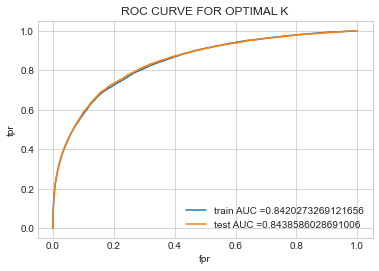

Area under train roc 0.8420273269121656
Area under test roc 0.8438586028691006


In [40]:

best_est = LogisticRegression(solver='liblinear',class_weight='balanced')
best_est = best_est.fit(x_train,y_train_)
y_pred = best_est.predict(x_cv)

train_fpr, train_tpr, thresholds = roc_curve(y_train_, best_est.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_cv_, best_est.predict_proba(x_cv)[:,1])
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


In [56]:
#Calculating and printing the f1 score
pred_test = best_est.predict(x_cv)
f1_test = f1_score(y_cv_, pred_test)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.18599171362931252


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_cv_,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86    170963
           1       0.11      0.76      0.19      6199

    accuracy                           0.77    177162
   macro avg       0.55      0.77      0.52    177162
weighted avg       0.96      0.77      0.84    177162



In [41]:
x_train.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\X_train_encoded_baseline.csv", index=False)
y_train_.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\y_train_encoded_baseline.csv", index=False)
x_cv.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\X_cv_encoded_baseline.csv", index=False)
y_cv_.to_csv(r"C:\Users\rahul\fraudulent transaction detection\data\after_split\y_cv_encoded_baseline.csv", index=False)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv_,y_pred)

array([[167645,   3318],
       [  2575,   3624]], dtype=int64)

In [42]:
from sklearn.metrics import f1_score
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# instantiate
dtc = DecisionTreeClassifier()

# fit
dtc.fit(x_train, y_train_)

# predict
y_pred = dtc.predict(x_cv)

# f1 score
score = f1_score(y_pred, y_cv_)

# print
print ("Decision Tree F1 score: {:.2f}".format(score))

Decision Tree F1 score: 0.55


## XGBOOST


In [47]:
# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[1000,2000],'max_depth':[3,6,12],'subsample':[0.4,0.8]}



clf = xgb.XGBClassifier( 
        missing=-1, learning_rate=0.02,
        eval_metric='auc', tree_method='gpu_hist',colsample_bytree=0.4)



model = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='roc_auc', verbose=1, cv=3, n_iter=6)
model.fit(x_train,y_train_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02, max_bin=None,...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=-1,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=6,
                   param_distributions={'max_depth': [3, 6, 12],
                                        'n_estimators': [1000, 2000],
                                        'subsample': [0.4, 0.8]},
                   scoring='roc_auc', verbose=1)

In [52]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_cv)

train_fpr, train_tpr, thresholds = roc_curve(y_train_, model.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_cv_, model.predict_proba(x_cv)[:,1])

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

Area under train roc 0.9969658358456239
Area under test roc 0.9685812168286296


In [53]:
import pickle as pkl

In [54]:
pkl.dump(model, open("xgboost_best_model.pkl", "wb"))

In [60]:
#Calculating and printing the f1 score
pred_xg = model.predict(x_cv)
f1_test = f1_score(y_cv_, pred_xg)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.7242201470296047


In [61]:
print(classification_report(y_cv_,pred_xg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    170963
           1       0.94      0.59      0.72      6199

    accuracy                           0.98    177162
   macro avg       0.96      0.79      0.86    177162
weighted avg       0.98      0.98      0.98    177162

